In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar los datos del archivo CSV
file_path_train = 'https://raw.githubusercontent.com/HenryZumaeta/CorregirDemMorin/main/db/point_train.csv'
data = pd.read_csv(file_path_train)

data.head()

,ESTE,NORTE,Z_TOPO,Z_DEM
0,731292.5981,9070528.282,0.144009,3.92668
1,731293.5981,9070528.282,0.224020,3.93656
2,731294.5981,9070528.282,0.304032,3.94666
3,731295.5981,9070528.282,0.384044,3.95024
4,731296.5981,9070528.282,0.464055,3.93949


In [4]:
# Cargar los datos del archivo CSV
file_path_pred = 'https://raw.githubusercontent.com/HenryZumaeta/CorregirDemMorin/main/db/point_predic.csv'
X_corregir = pd.read_csv(file_path_pred)

X_corregir.head()

,ESTE,NORTE,Z_DEM
0,731634.7486,9071006.756,3.07979
1,731684.7486,9071006.756,3.07979
2,731734.7486,9071006.756,4.55879
3,731784.7486,9071006.756,4.72184
4,731834.7486,9071006.756,8.25214


# Gráficos

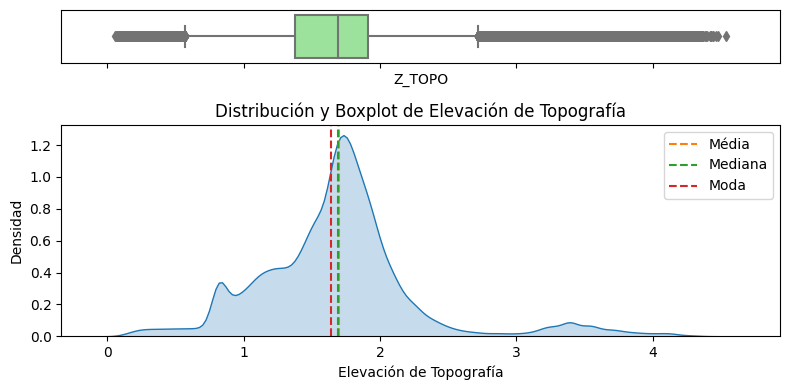

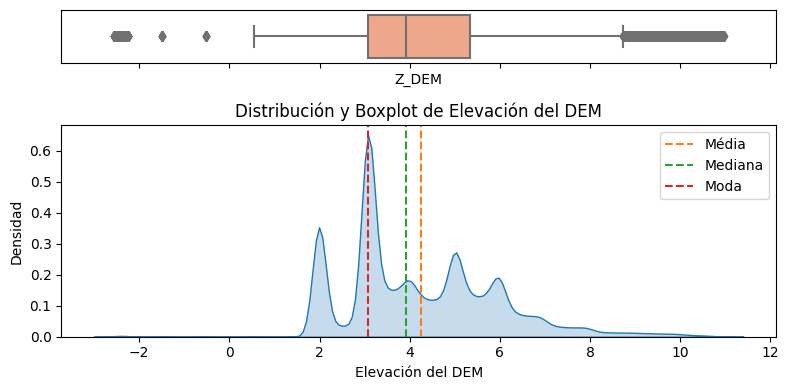

In [5]:
# TOPOGRAFÍA
# Crear una figura con dos subplots para Z_TOPO
f, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 4),
                     gridspec_kw={"height_ratios": (.20, .80)})

# Boxplot horizontal para Z_TOPO
sns.boxplot(x=data['Z_TOPO'], ax=ax[0], color='lightgreen')
ax[0].set(yticks=[], ylabel='')

# KDE para Z_TOPO con densidad
sns.kdeplot(data['Z_TOPO'], ax=ax[1], fill=True)
ax[1].axvline(data['Z_TOPO'].mean(), color="C1", linestyle="--", label="Media")
ax[1].axvline(data['Z_TOPO'].median(), color="C2", linestyle="--", label="Mediana")
ax[1].axvline(data['Z_TOPO'].mode()[0], color="C3", linestyle="--", label="Moda")
ax[1].set_title('Distribución y Boxplot de Elevación de Topografía')
ax[1].set_xlabel('Elevación de Topografía')
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()
plt.show()

# DEM
# Crear una figura con dos subplots para Z_DEM
f, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 4),
                     gridspec_kw={"height_ratios": (.20, .80)})

# Boxplot horizontal para Z_DEM
sns.boxplot(x=data['Z_DEM'], ax=ax[0], color='LightSalmon')
ax[0].set(yticks=[], ylabel='')

# KDE para Z_DEM con densidad
sns.kdeplot(data['Z_DEM'], ax=ax[1], fill=True)
ax[1].axvline(data['Z_DEM'].mean(), color="C1", linestyle="--", label="Media")
ax[1].axvline(data['Z_DEM'].median(), color="C2", linestyle="--", label="Mediana")
ax[1].axvline(data['Z_DEM'].mode()[0], color="C3", linestyle="--", label="Moda")
ax[1].set_title('Distribución y Boxplot de Elevación del DEM')
ax[1].set_xlabel('Elevación del DEM')
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()
plt.show()

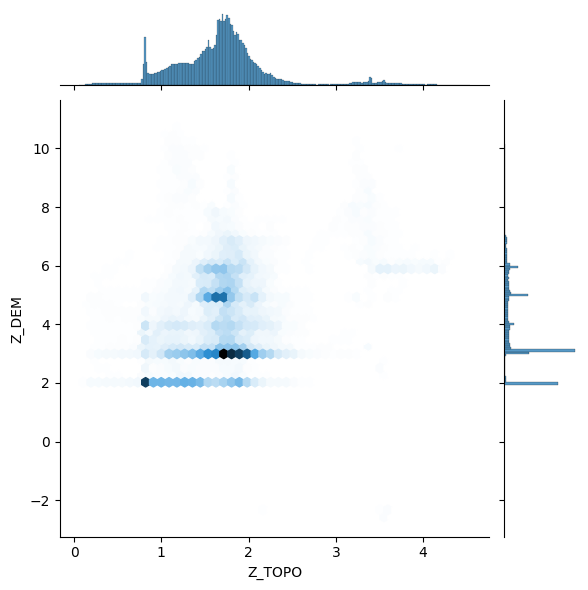

In [6]:
# Crear un gráfico combinado de scatter plot con regresión y histogramas con KDE
sns.jointplot(x='Z_TOPO', y='Z_DEM', data=data, kind='hex', height=6, marginal_kws={'fill': True})

# Mostrar la figura
plt.show()

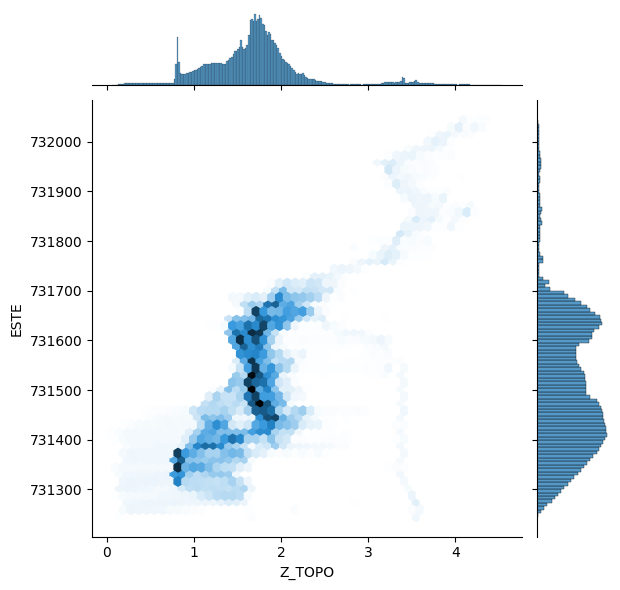

In [7]:
# Crear un gráfico combinado de scatter plot con regresión y histogramas con KDE
sns.jointplot(x='Z_TOPO', y='ESTE', data=data, kind='hex', height=6, marginal_kws={'fill': True})

# Mostrar la figura
plt.show()

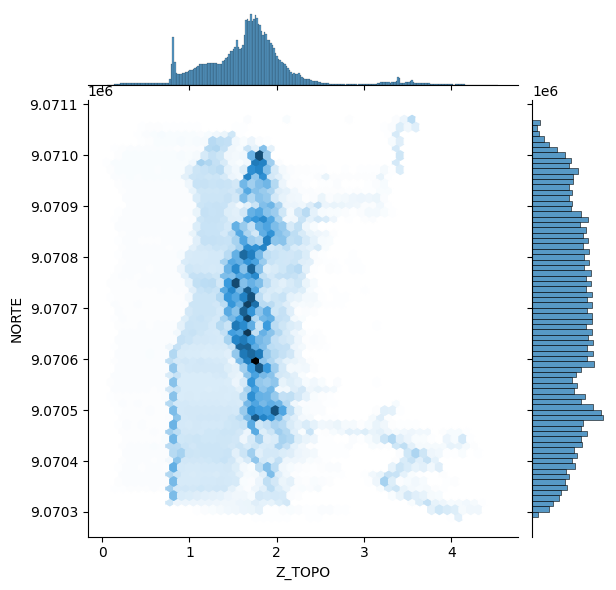

In [8]:
# Crear un gráfico combinado de scatter plot con regresión y histogramas con KDE
sns.jointplot(x='Z_TOPO', y='NORTE', data=data, kind='hex', height=6, marginal_kws={'fill': True})

# Mostrar la figura
plt.show()

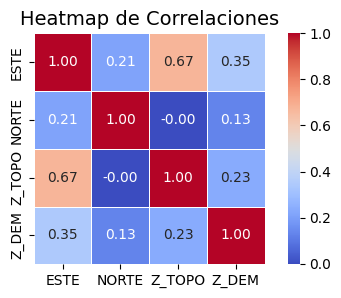

In [10]:
# Calcular la matriz de correlación
correlaciones = data.corr(method='spearman')

# Configurar el tamaño del gráfico
plt.figure(figsize=(6, 3))

# Crear un heatmap de correlaciones
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)

# Configurar el título y mostrar el gráfico
plt.title('Heatmap de Correlaciones', fontsize=14)
plt.show()

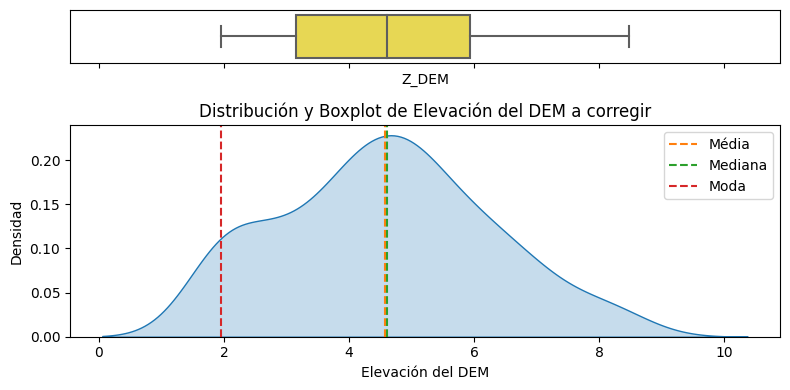

In [11]:
# DEM a corregir
# Crear una figura con dos subplots para Z_DEM
f, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 4),
                     gridspec_kw={"height_ratios": (.20, .80)})

# Boxplot horizontal para Z_DEM
sns.boxplot(x=X_corregir['Z_DEM'], ax=ax[0], color='#ffeb3b')
ax[0].set(yticks=[], ylabel='')

# KDE para Z_DEM con densidad
sns.kdeplot(X_corregir['Z_DEM'], ax=ax[1], fill=True)
ax[1].axvline(X_corregir['Z_DEM'].mean(), color="C1", linestyle="--", label="Media")
ax[1].axvline(X_corregir['Z_DEM'].median(), color="C2", linestyle="--", label="Mediana")
ax[1].axvline(X_corregir['Z_DEM'].mode()[0], color="C3", linestyle="--", label="Moda")
ax[1].set_title('Distribución y Boxplot de Elevación del DEM a corregir')
ax[1].set_xlabel('Elevación del DEM')
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()
plt.show()

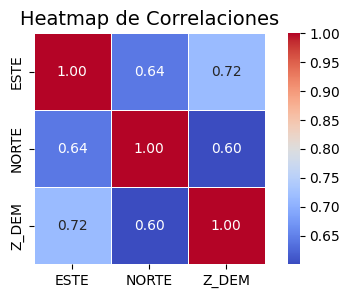

In [12]:
# Calcular la matriz de correlación
correlaciones = X_corregir.corr(method='spearman')

# Configurar el tamaño del gráfico
plt.figure(figsize=(6, 3))

# Crear un heatmap de correlaciones
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)

# Configurar el título y mostrar el gráfico
plt.title('Heatmap de Correlaciones', fontsize=14)
plt.show()

# TRAIN Y TEST

In [13]:
# Seleccionar características y objetivo
X = data[['ESTE', 'NORTE', 'Z_DEM']]
y = data['Z_TOPO']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RANDOM FOREST REGRESOR

In [14]:
# Crear y entrenar el modelo
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

## Importancia de las variables

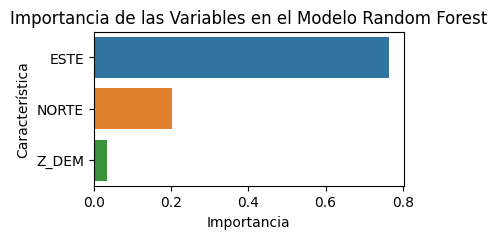

In [15]:
# Obtener la importancia de las características
importancias = model.feature_importances_

# Crear un DataFrame para visualizar la importancia de cada característica
importancia_df = pd.DataFrame({
    'Característica': X_train.columns,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(4, 2))
sns.barplot(x='Importancia', y='Característica', data=importancia_df)
plt.title('Importancia de las Variables en el Modelo Random Forest')
plt.show()

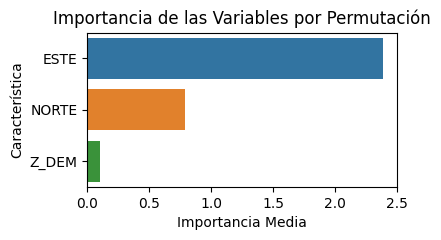

In [16]:
from sklearn.inspection import permutation_importance

# Evaluar la importancia de las características con permutación
resultados = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Crear un DataFrame para visualizar la importancia de cada característica
importancia_df = pd.DataFrame({
    'Característica': X_test.columns,
    'Importancia Media': resultados.importances_mean,
    'Desviación Estándar': resultados.importances_std
}).sort_values(by='Importancia Media', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(4, 2))
sns.barplot(x='Importancia Media', y='Característica', data=importancia_df)
plt.title('Importancia de las Variables por Permutación')
plt.show()

In [15]:
# Predecir en el conjunto de  entrenamiento y prueba
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

## Errores

In [16]:
# @title En Test

y_true = y_test.copy() # Your real values / test labels
y_pred = predict_test.copy() # The predictions from your ML / RF model

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.root_mean_squared_error(y_true, y_pred))
print('Mean Absolute Percentage Error (MAPE):', (metrics.mean_absolute_percentage_error(y_true, y_pred)) * 100, '%')
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
print('Max Error:', metrics.max_error(y_true, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_true, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
print('R^2:', metrics.r2_score(y_true, y_pred))

Mean Absolute Error (MAE): 0.008355671105876225
Mean Squared Error (MSE): 0.0017308828520489442
Root Mean Squared Error (RMSE): 0.041603880252314734
Mean Absolute Percentage Error (MAPE): 0.5756154416671506 %
Explained Variance Score: 0.9952084047795331
Max Error: 2.5471484363333374
Mean Squared Log Error: 0.00018650199885204155
Median Absolute Error: 0.0020623481666673937
R^2: 0.9952083920075313


In [17]:
# @title En Train

y_true = y_train.copy() # Your real values / test labels
y_pred = predict_train.copy() # The predictions from your ML / RF model

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.root_mean_squared_error(y_true, y_pred))
print('Mean Absolute Percentage Error (MAPE):', (metrics.mean_absolute_percentage_error(y_true, y_pred)) * 100, '%')
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
print('Max Error:', metrics.max_error(y_true, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_true, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
print('R^2:', metrics.r2_score(y_true, y_pred))

Mean Absolute Error (MAE): 0.0031473520790168455
Mean Squared Error (MSE): 0.00021880548898424196
Root Mean Squared Error (RMSE): 0.014792075208848891
Mean Absolute Percentage Error (MAPE): 0.2029091507676707 %
Explained Variance Score: 0.9994025984291885
Max Error: 0.7589688529999927
Mean Squared Log Error: 2.4694079876204017e-05
Median Absolute Error: 0.000768486833333859
R^2: 0.999402598305411


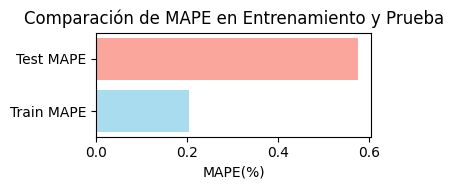

In [18]:
# Calcular MAPE para entrenamiento y prueba
train_mape = metrics.mean_absolute_percentage_error(y_train, predict_train)*100
test_mape = metrics.mean_absolute_percentage_error(y_test, predict_test)*100

plt.figure(figsize=(4, 2))

# Gráfico de barras para MAPE
plt.barh(['Train MAPE', 'Test MAPE'], [train_mape, test_mape], color=['skyblue', 'salmon'], alpha=0.7)
plt.xlabel('MAPE(%)')
plt.title('Comparación de MAPE en Entrenamiento y Prueba')
plt.tight_layout()
plt.show()

In [19]:
# Predecir elevaciones corregidas para todo el conjunto de datos
data['Z_DEM_CORREGIDO'] = model.predict(data[['ESTE', 'NORTE', 'Z_DEM']])

# Mostrar las primeras filas con las elevaciones corregidas
data

,ESTE,NORTE,Z_TOPO,Z_DEM,Z_DEM_CORREGIDO
0,731292.5981,9070528.282,0.144009,3.92668,0.151857
1,731293.5981,9070528.282,0.224020,3.93656,0.224924
2,731294.5981,9070528.282,0.304032,3.94666,0.306721
3,731295.5981,9070528.282,0.384044,3.95024,0.379692
4,731296.5981,9070528.282,0.464055,3.93949,0.471234
...,...,...,...,...,...
217765,731601.5981,9071006.282,1.792790,3.07979,1.793520
217766,731602.5981,9071006.282,1.790840,3.07979,1.791916
217767,731603.5981,9071006.282,1.788900,3.07979,1.792057
217768,731604.5981,9071006.282,1.786960,3.07979,1.790284


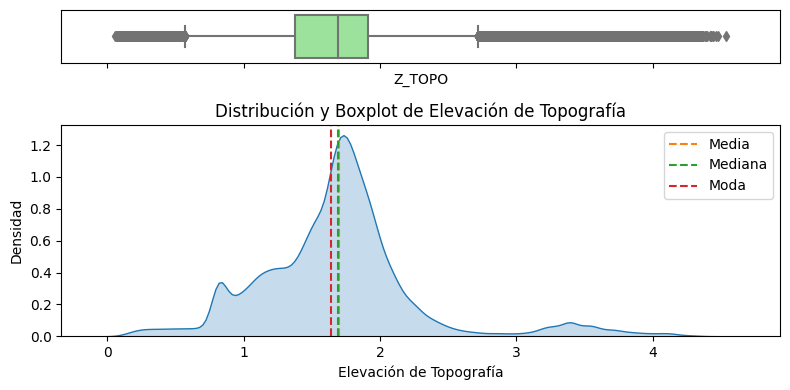

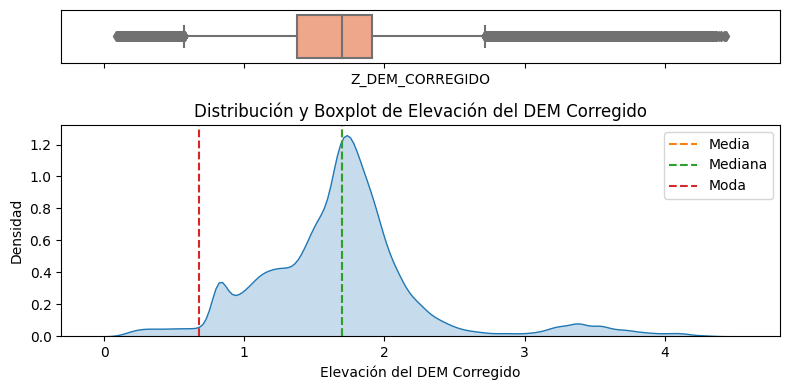

In [20]:
# TOPOGRAFÍA
# Crear una figura con dos subplots para Z_TOPO
f, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 4),
                     gridspec_kw={"height_ratios": (.20, .80)})

# Boxplot horizontal para Z_TOPO
sns.boxplot(x=data['Z_TOPO'], ax=ax[0], color='lightgreen')
ax[0].set(yticks=[], ylabel='')

# KDE para Z_TOPO con densidad
sns.kdeplot(data['Z_TOPO'], ax=ax[1], fill=True)
ax[1].axvline(data['Z_TOPO'].mean(), color="C1", linestyle="--", label="Media")
ax[1].axvline(data['Z_TOPO'].median(), color="C2", linestyle="--", label="Mediana")
ax[1].axvline(data['Z_TOPO'].mode()[0], color="C3", linestyle="--", label="Moda")
ax[1].set_title('Distribución y Boxplot de Elevación de Topografía')
ax[1].set_xlabel('Elevación de Topografía')
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()
plt.show()

# DEM Z_DEM_CORREGIDO
# Crear una figura con dos subplots para Z_DEM_CORREGIDO
f, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 4),
                     gridspec_kw={"height_ratios": (.20, .80)})

# Boxplot horizontal para Z_DEM_CORREGIDO
sns.boxplot(x=data['Z_DEM_CORREGIDO'], ax=ax[0], color='LightSalmon')
ax[0].set(yticks=[], ylabel='')

# KDE para Z_DEM_CORREGIDO con densidad
sns.kdeplot(data['Z_DEM_CORREGIDO'], ax=ax[1], fill=True)
ax[1].axvline(data['Z_DEM_CORREGIDO'].mean(), color="C1", linestyle="--", label="Media")
ax[1].axvline(data['Z_DEM_CORREGIDO'].median(), color="C2", linestyle="--", label="Mediana")
ax[1].axvline(data['Z_DEM_CORREGIDO'].mode()[0], color="C3", linestyle="--", label="Moda")
ax[1].set_title('Distribución y Boxplot de Elevación del DEM Corregido')
ax[1].set_xlabel('Elevación del DEM Corregido')
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()
plt.show()

In [22]:
# Predecir elevaciones corregidas para todo el conjunto de datos
X_corregir['Z_DEM_CORREGIDO'] = model.predict(X_corregir)
X_corregir

,ESTE,NORTE,Z_DEM,Z_DEM_CORREGIDO
0,731634.7486,9071006.756,3.07979,1.774373
1,731684.7486,9071006.756,3.07979,1.697549
2,731734.7486,9071006.756,4.55879,2.605698
3,731784.7486,9071006.756,4.72184,3.633977
4,731834.7486,9071006.756,8.25214,3.875154
...,...,...,...,...
128,731434.7486,9070006.756,1.94594,1.997316
129,731484.7486,9070006.756,2.44413,2.440849
130,731534.7486,9070006.756,4.01152,1.955690
131,731584.7486,9070006.756,3.00000,1.810811


In [24]:
# Guardar
output_file_path_1 = 'PUNTOS_CORREGIDOS_TOPOGRAFIA.csv'
output_file_path_2 = 'PUNTOS_CORREGIDOS_DEM_ONLY.csv'
data.to_csv(output_file_path_1, index=False)
X_corregir.to_csv(output_file_path_2, index=False)

print(f'Resultados guardados en: {output_file_path_1}')
print(f'Resultados guardados en: {output_file_path_2}')

Resultados guardados en: PUNTOS_CORREGIDOS_TOPOGRAFIA.csv
Resultados guardados en: PUNTOS_CORREGIDOS_DEM_ONLY.csv
